In [1]:
import qho_functions as qho

In [2]:
omega = 1.0 # Angular frequency
L = 5 # Range of x from -L to L
N = 1000  # Number of grid points
k = 16 # Number of eigenvalues

In [3]:
energies_2, wfc_2 = qho.harmonic_oscillator_spectrum(omega, L, N, order = 2)
energies_4, wfc_4 = qho.harmonic_oscillator_spectrum(omega, L, N, order = 4)
energies_6, wfc_6 = qho.harmonic_oscillator_spectrum(omega, L, N, order = 6)

print(f'First {k} eigenvalues for second order approximation:\n {energies_2[:k]}')
print(f'First {k} eigenvalues for fourth order approximation:\n {energies_4[:k]}')
print(f'First {k} eigenvalues for sixth order approximation:\n {energies_6[:k]}')

First 16 eigenvalues for second order approximation:
 [ 0.49999687  1.49998435  2.49995937  3.49992284  4.49988328  5.49990059
  6.50029586  7.50239486  8.51038706  9.53424123 10.59149723 11.70472684
 12.89520395 14.17780105 15.56032887 17.04575784]
First 16 eigenvalues for fourth order approximation:
 [ 0.5         1.5         2.50000007  3.50000112  4.50001173  5.50009212
  6.50056519  7.50276344  8.51089487  9.53496425 10.59255721 11.70627931
 12.8974124  14.18081998 15.56430406 17.05083508]
First 16 eigenvalues for sixth order approximation:
 [-54.9321538  -53.90746409 -52.88277962 -51.85809885 -50.83340771
 -49.80861109 -48.78322062 -47.75532011 -46.71921183 -45.66227612
 -44.5640359  -43.40032568 -42.15028933 -40.80055722 -39.34470995
 -37.78060808]


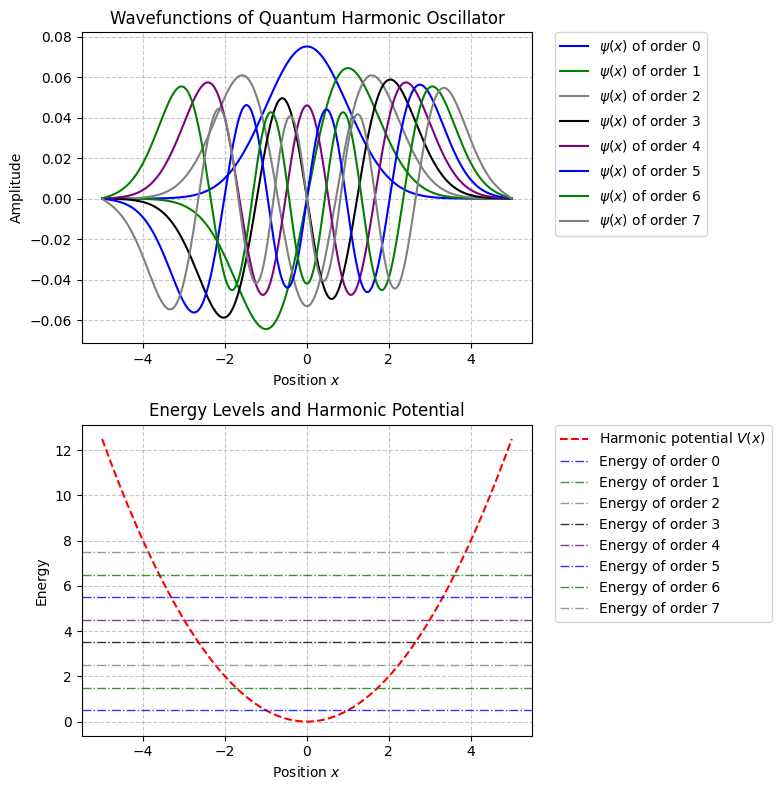

In [4]:
qho.plot_wf_en(omega, N, L, k=8, order=2)

# PROGRAM EVALUATION

### *Correctness*: comparison with analytical solution

In [5]:
L = 5
N = 1000
omega = 1
k = 16

In [6]:
analytical_energies = [qho.harmonic_en(omega, k) for k in range(0, k)]
print(f'First {k} eigenvalues for analytical solution:\n {analytical_energies[:k]}')

First 16 eigenvalues for analytical solution:
 [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5]


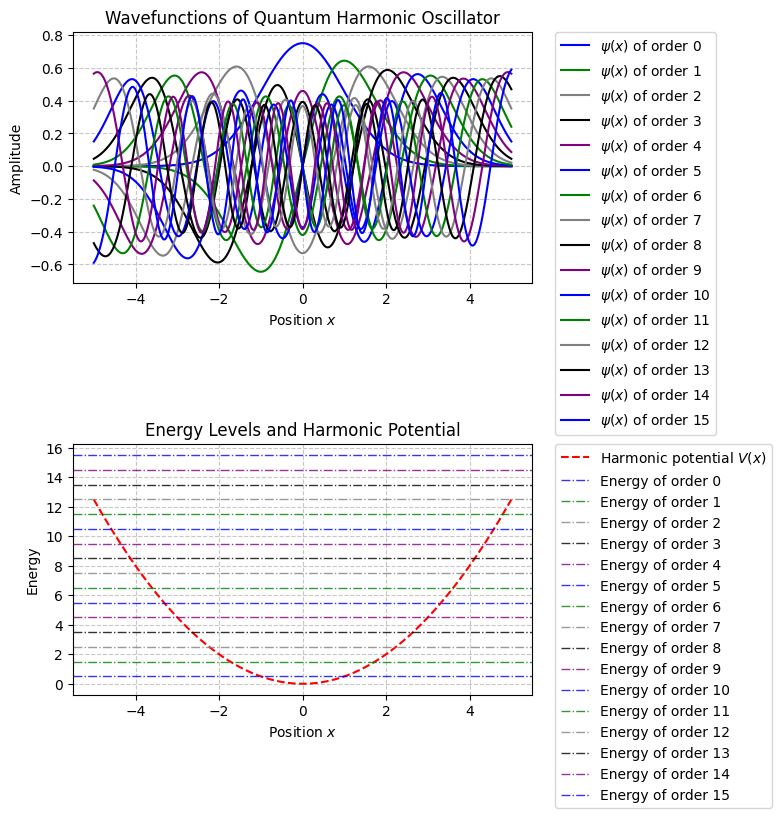

In [7]:
qho.plot_wf_en(omega, N, L, k)